# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

View a sample from the dataset.

13


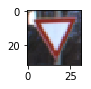

In [4]:
import random

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

Plotting the count of each sign in training set.

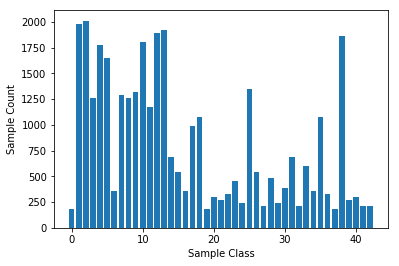

In [5]:
# plotting the count of each sign

x_pos = range(n_classes)
label_list = y_train.tolist()
sign_count = [label_list.count(x) for x in range(n_classes)]

plt.bar(x_pos, sign_count, width=0.8, align='center')
plt.ylabel('Sample Count')
plt.xlabel('Sample Class')
plt.savefig('./examples/visualization.jpg')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Implement Min-Max scaling for image data
def normalize_data(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.0, 1.0]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.0
    b = 1.0
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

X_train = normalize_data(X_train)
X_valid = normalize_data(X_valid)
X_test = normalize_data(X_test)

Generating additional data for training.

In [7]:
# This code fragment is obtained from https://github.com/navoshta/traffic-signs/blob/master/Traffic_Signs_Recognition.ipynb

def flip_extend(X, y):
    """
    Extends existing images dataset by flipping images of some classes. As some images would still belong
    to same class after flipping we extend such classes with flipped images. Images of other would toggle 
    between two classes when flipped, so for those we extend existing datasets as well.
    
    Parameters
    ----------
    X       : ndarray
              Dataset array containing feature examples.
    y       : ndarray, optional, defaults to `None`
              Dataset labels in index form.

    Returns
    -------
    A tuple of X and y.    
    """
    # Classes of signs that, when flipped horizontally, should still be classified as the same class
    self_flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
    # Classes of signs that, when flipped vertically, should still be classified as the same class
    self_flippable_vertically = np.array([1, 5, 12, 15, 17])
    # Classes of signs that, when flipped horizontally and then vertically, should still be classified as the same class
    self_flippable_both = np.array([32, 40])
    # Classes of signs that, when flipped horizontally, would still be meaningful, but should be classified as some other class
    cross_flippable = np.array([
        [19, 20], 
        [33, 34], 
        [36, 37], 
        [38, 39],
        [20, 19], 
        [34, 33], 
        [37, 36], 
        [39, 38],   
    ])
    num_classes = 43
    
    X_extended = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype = X.dtype)
    y_extended = np.empty([0], dtype = y.dtype)

    for c in range(num_classes):
        # First copy existing data for this class
        X_extended = np.append(X_extended, X[y == c], axis = 0)
        # If we can flip images of this class horizontally and they would still belong to said class...
        if c in self_flippable_horizontally:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X[y == c][:, :, ::-1, :], axis = 0)
        # If we can flip images of this class horizontally and they would belong to other class...
        if c in cross_flippable[:, 0]:
            # ...Copy flipped images of that other class to the extended array.
            flip_class = cross_flippable[cross_flippable[:, 0] == c][0][1]
            X_extended = np.append(X_extended, X[y == flip_class][:, :, ::-1, :], axis = 0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        # If we can flip images of this class vertically and they would still belong to said class...
        if c in self_flippable_vertically:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, :, :], axis = 0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        # If we can flip images of this class horizontally AND vertically and they would still belong to said class...
        if c in self_flippable_both:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, ::-1, :], axis = 0)
        
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
    
    return (X_extended, y_extended)

X_train_extended, y_train_extended = flip_extend(X_train, y_train)

7


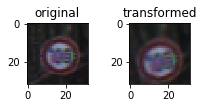

In [8]:
import math
import cv2
import numpy as np

# This code fragment is obtained from 
# https://github.com/hengck23-udacity/udacity-driverless-car-nd-p2/blob/master/submission(notebook%2Bhtml)/002/Traffic_Sign_Classifier.ipynb

# use opencv to do data agumentation
# see also: https://github.com/dmlc/mxnet/blob/master/python/mxnet/image.py
def perturb(image, keep, angle_limit=15, scale_limit=0.1, translate_limit=3, distort_limit=3):

    u=np.random.uniform()
    if u>keep :
        #geometric -------------
        (W, H, C) = image.shape
        center = np.array([W / 2., H / 2.])
        da = np.random.uniform(low=-1, high=1) * angle_limit/180. * math.pi
        scale = np.random.uniform(low=-1, high=1) * scale_limit + 1

        cc = scale*math.cos(da)
        ss = scale*math.sin(da)
        rotation    = np.array([[cc, ss],[-ss,cc]])
        translation = np.random.uniform(low=-1, high=1, size=(1,2)) * translate_limit
        distort     = np.random.standard_normal(size=(4,2)) * distort_limit

        pts1 = np.array([[0., 0.], [0., H], [W, H], [W, 0.]])
        pts2 = np.matmul(pts1-center, rotation) + center  + translation

        #add perspective noise
        pts2 = pts2 + distort


        #http://milindapro.blogspot.jp/2015/05/opencv-filters-copymakeborder.html
        matrix  = cv2.getPerspectiveTransform(pts1.astype(np.float32), pts2.astype(np.float32)) 
        perturb = cv2.warpPerspective(image, matrix, (W, H), flags=cv2.INTER_LINEAR,
                                      borderMode=cv2.BORDER_REFLECT_101)  # BORDER_WRAP  #BORDER_REFLECT_101  #cv2.BORDER_CONSTANT  BORDER_REPLICATE

        return perturb

    else:
        return image
    
    
def make_perturb_images(images, keep ):
    arguments = np.zeros(images.shape)
    for n in range(len(images)):
        perturb_img = perturb(images[n],keep = keep)
        arguments[n] = perturb_img
        
    return arguments

index = random.randint(0,len(X_train))
perturbs = make_perturb_images(X_train[index:index+1],0.0)
image = X_train[index].squeeze()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(3, 2))
fig.tight_layout()

print(y_train[index])

ax1.imshow(image)
ax1.set_title('original')

image = perturbs[0].squeeze()
ax2.imshow(image)
ax2.set_title('transformed')
plt.show()

fig.savefig('./examples/random_transform.jpg')

In [9]:
def balance_data(X, y, min_samples):
    label_list = y.tolist()
    
    X_extended = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype = X.dtype)
    y_extended = np.empty([0], dtype = y.dtype)
    
    num_classes = 43
    
    for c in range(num_classes):
        # First copy existing data for this class
        X_extended = np.append(X_extended, X[y == c], axis = 0)
        count = label_list.count(c)
        if count < min_samples:
            copies = int(min_samples/count)
            X_generated = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype = X.dtype)
            class_indices = np.where(y == c)
            n_samples = len(class_indices[0])
            for i in range(n_samples):
                for j in range(copies):
                    new_img = X[class_indices[0][i]]
                    X_generated = np.append(X_generated, [new_img], axis=0)
            X_extended = np.append(X_extended, X_generated, axis = 0)       
        
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
       
    return (X_extended, y_extended)

X_train_extended, y_train_extended = balance_data(X_train_extended, y_train_extended,2000)

In [10]:
# TODO: Number of training examples
n_train_extended = X_train_extended.shape[0]

label_list = y_train.tolist()
sign_count = [label_list.count(x) for x in range(n_classes)]

extended_label_list = y_train_extended.tolist()
extended_sign_count = [extended_label_list.count(x) for x in range(n_classes)]

print("Number of extended training examples =", n_train_extended)
print("Minimum number of examples in a training class =", min(sign_count))
print("Maximum number of examples in a training class =", max(sign_count))
print("Minimum number of examples in an extended training class =", min(extended_sign_count))
print("Maximum number of examples in an extended training class =", max(extended_sign_count))

Number of extended training examples = 112134
Minimum number of examples in a training class = 180
Maximum number of examples in a training class = 2010
Minimum number of examples in an extended training class = 2010
Maximum number of examples in an extended training class = 7560


Shuffle the training data.

In [11]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train_extended, y_train_extended)

Plotting the count of each sign in extended training set.

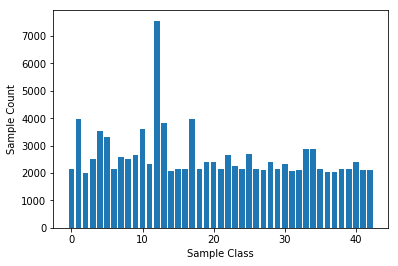

In [12]:
# plotting the count of each sign

x_pos = range(n_classes)
label_list = y_train.tolist()
sign_count = [label_list.count(x) for x in range(n_classes)]

plt.bar(x_pos, sign_count, width=0.8, align='center')
plt.ylabel('Sample Count')
plt.xlabel('Sample Class')
plt.show()

### Model Architecture

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 16

Implement the Densenet neural network architecture.

In [14]:
# Following code is based on https://github.com/LaurentMazare/deep-models/blob/master/densenet/densenet.py
# layer count is reduced to 4

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.01)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.01, shape=shape)
    return tf.Variable(initial)

def conv2d(input, in_features, out_features, kernel_size, with_bias=False):
    W = weight_variable([ kernel_size, kernel_size, in_features, out_features ])
    conv = tf.nn.conv2d(input, W, [ 1, 1, 1, 1 ], padding='SAME')
    if with_bias:
        return conv + bias_variable([ out_features ])
    return conv

def batch_activ_conv(current, in_features, out_features, kernel_size, is_training, keep_prob):
    current = tf.contrib.layers.batch_norm(current, scale=True, is_training=is_training, updates_collections=None)
    current = tf.nn.relu(current)
    current = conv2d(current, in_features, out_features, kernel_size)
    current = tf.nn.dropout(current, keep_prob)
    return current

def block(input, layers, in_features, growth, is_training, keep_prob):
    current = input
    features = in_features
    for idx in range(layers):
        tmp = batch_activ_conv(current, features, growth, 3, is_training, keep_prob)
        current = tf.concat((current, tmp),3)
        features += growth
    return current, features

def avg_pool(input, s):
    return tf.nn.avg_pool(input, [ 1, s, s, 1 ], [1, s, s, 1 ], 'VALID')

def DenseNet(x,input_layers,keep_prob,is_training):
    layers = 4
    conv1 = conv2d(x, input_layers, 32, 5)

    current, features = block(conv1, layers, 32, 24, is_training, keep_prob)
    block1 = batch_activ_conv(current, features, features, 1, is_training, keep_prob)
    block1_pool = avg_pool(block1, 2)
    current, features = block(block1_pool, layers, features, 24, is_training, keep_prob)
    block2 = batch_activ_conv(current, features, features, 1, is_training, keep_prob)
    block2_pool = avg_pool(block2, 2)
    current, features = block(block2_pool, layers, features, 24, is_training, keep_prob)

    current = tf.contrib.layers.batch_norm(current, scale=True, is_training=is_training, updates_collections=None)
    block3 = tf.nn.relu(current)
    current = avg_pool(block3, 8)
    final_dim = features
    current = tf.reshape(current, [ -1, final_dim ])
    Wfc = weight_variable([ final_dim, 43 ])
    bfc = bias_variable([ 43 ])
    logits = tf.matmul(current, Wfc) + bfc
    
    conv_layers = {
        'conv1':conv1,
        'block1':block1,
        'block1_pool':block1_pool,
        'block2':block2,
        'block2_pool':block2_pool,
        'block3':block3
    }
                   
    return logits, conv_layers

In [15]:
def TransNet(x,is_train):
    alpha = 0.25
    
    # Preprocess
    p = conv2d(x,3, 10, 3,with_bias=True)
    p = tf.contrib.layers.batch_norm(p, scale=True, is_training=is_train, updates_collections=None)    
    conv1 = tf.maximum(alpha*p,p)
    
    p = conv2d(conv1,  10, 3, 1,with_bias=True)    
    p = tf.contrib.layers.batch_norm(p, scale=True, is_training=is_train, updates_collections=None) 
    conv2 = tf.maximum(alpha*p,p)
    
    preconv_layers = {
        'conv1':conv1,
        'conv2':conv2,
    }
    
    return conv2, preconv_layers

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [1]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

In [16]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

keep_prob = tf.placeholder(tf.float32)
is_train = tf.placeholder(tf.bool)
rate = tf.placeholder(tf.float32)
beta = tf.placeholder(tf.float32)

In [17]:
#beta = 0.0001

transformed, preconv_layers = TransNet(x,is_train)
logits, conv_layers =  DenseNet(transformed,3,keep_prob,is_train)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss = tf.reduce_mean(cross_entropy)
# Loss function with L2 Regularization
regularizers = tf.add_n([tf.nn.l2_loss(var) for var in tf.trainable_variables()])
loss_operation = loss + beta * regularizers

optimizer = tf.train.MomentumOptimizer(rate, 0.9, use_nesterov=True)
training_operation = optimizer.minimize(loss_operation)

Evaluate how well the loss and accuracy of the model for a given dataset.

In [18]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 1.0, is_train: False})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

keep_p = 0.5
Training...

EPOCH 7 ...
Training Accuracy = 0.924
Validation Accuracy = 0.875

EPOCH 8 ...
Training Accuracy = 0.967
Validation Accuracy = 0.927

EPOCH 9 ...
Training Accuracy = 0.995
Validation Accuracy = 0.973

EPOCH 10 ...
Training Accuracy = 0.995
Validation Accuracy = 0.974



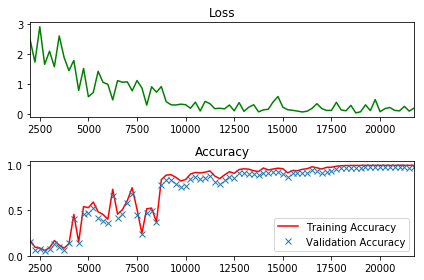

keep_p = 0.6
Training...

EPOCH 7 ...
Training Accuracy = 0.855
Validation Accuracy = 0.816

EPOCH 8 ...
Training Accuracy = 0.948
Validation Accuracy = 0.877

EPOCH 9 ...
Training Accuracy = 0.997
Validation Accuracy = 0.983

EPOCH 10 ...
Training Accuracy = 0.997
Validation Accuracy = 0.983



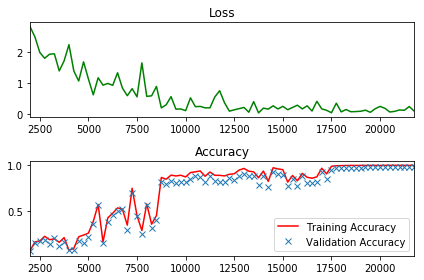

keep_p = 0.8
Training...

EPOCH 7 ...
Training Accuracy = 0.991
Validation Accuracy = 0.973

EPOCH 8 ...
Training Accuracy = 0.990
Validation Accuracy = 0.971

EPOCH 9 ...
Training Accuracy = 1.000
Validation Accuracy = 0.989

EPOCH 10 ...
Training Accuracy = 1.000
Validation Accuracy = 0.990



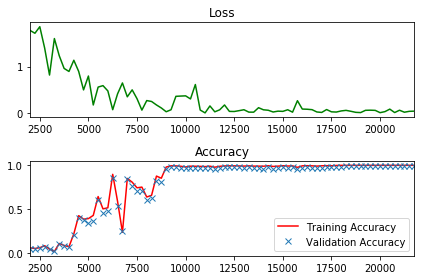

keep_p = 0.9
Training...

EPOCH 7 ...
Training Accuracy = 0.998
Validation Accuracy = 0.983

EPOCH 8 ...
Training Accuracy = 0.992
Validation Accuracy = 0.971

EPOCH 9 ...
Training Accuracy = 1.000
Validation Accuracy = 0.989

EPOCH 10 ...
Training Accuracy = 1.000
Validation Accuracy = 0.990



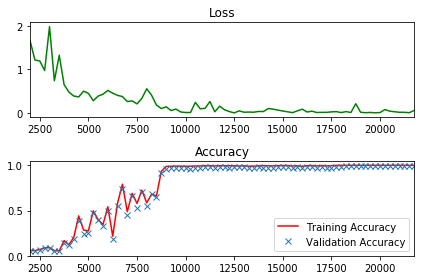

In [15]:
# TODO: Find the best parameters for each configuration
perturb_rates = [0.8,0.6,0.4,0.2] # 1.0-keep (0.4)
batch_sizes = [16,32,64,128] # 16
learn_rates = [0.5,0.1,0.05,0.01] # 0.05
l2_beta = [1e-2,1e-3,1e-4,1e-5] # 0.001
dropouts = [0.5,0.4,0.2,0.1] # 1.0-keep_prob ()

for step in dropouts:
    BATCH_SIZE = 16
    keep_ratio = 0.4
    keep_p = 1.0-step
    print("keep_p = {}".format(keep_p))
    
    # Measurements use for graphing loss and accuracy
    log_batch_step = 250
    batches = []
    loss_batch = []
    train_acc_batch = []
    valid_acc_batch = []


    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
        learning_rate = 0.05
        batch_i = 0
    
        print("Training...")
        print()
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            if (i>=4):
                learning_rate = 0.005
            if (i>=8):
                learning_rate = 0.0005
            for offset in range(0, num_examples, BATCH_SIZE):
                batch_i = batch_i + 1
                end = offset + BATCH_SIZE
                batch_x, batch_y = make_perturb_images(X_train[offset:end],keep_ratio), y_train[offset:end]
                _,l = sess.run([training_operation,loss], feed_dict={x: batch_x, y: batch_y, keep_prob: keep_p, rate: learning_rate,beta:0.001,is_train: True})
            
                # Log every 200 batches
                if not batch_i % log_batch_step and batch_i >= 2000:
                    # Calculate Training and Validation accuracy
                    training_accuracy = evaluate(X_train, y_train)
                    validation_accuracy = evaluate(X_valid, y_valid)

                    # Log batches
                    #previous_batch = batches[-1] if batches else 0
                    batches.append(batch_i)
                    loss_batch.append(l)
                    train_acc_batch.append(training_accuracy)
                    valid_acc_batch.append(validation_accuracy)

            if i > 5:
                validation_accuracy = evaluate(X_valid, y_valid)
                training_accuracy = evaluate(X_train, y_train)
                print("EPOCH {} ...".format(i+1))
                print("Training Accuracy = {:.3f}".format(training_accuracy))
                print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                print()
        
        #saver.save(sess, './lenet')
        #print("Model saved")
    loss_plot = plt.subplot(211)
    loss_plot.set_title('Loss')
    loss_plot.plot(batches, loss_batch, 'g')
    loss_plot.set_xlim([batches[0], batches[-1]])
    acc_plot = plt.subplot(212)
    acc_plot.set_title('Accuracy')
    acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
    acc_plot.plot(batches, valid_acc_batch, 'x', label='Validation Accuracy')
    #acc_plot.set_ylim([0, 1.0])
    acc_plot.set_xlim([batches[0], batches[-1]])
    acc_plot.legend(loc=4)
    plt.tight_layout()
    plt.show()

In [18]:
BATCH_SIZE = 16
EPOCHS = 20

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    learning_rate = 0.05
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        if (i==2):
            learning_rate = 0.02
        if (i==5):
            learning_rate = 0.005
        if (i==7):
            learning_rate = 0.002
        if (i==10):
            learning_rate = 0.0005
        if (i==15):
            learning_rate = 0.0002
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = make_perturb_images(X_train[offset:end],0.4), y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.8,is_train: True,beta:0.001,rate:learning_rate})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        training_accuracy = evaluate(X_train, y_train)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './transnet_densenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.311
Validation Accuracy = 0.320

EPOCH 2 ...
Training Accuracy = 0.659
Validation Accuracy = 0.608

EPOCH 3 ...
Training Accuracy = 0.914
Validation Accuracy = 0.881

EPOCH 4 ...
Training Accuracy = 0.948
Validation Accuracy = 0.928

EPOCH 5 ...
Training Accuracy = 0.978
Validation Accuracy = 0.959

EPOCH 6 ...
Training Accuracy = 0.994
Validation Accuracy = 0.980

EPOCH 7 ...
Training Accuracy = 0.996
Validation Accuracy = 0.984

EPOCH 8 ...
Training Accuracy = 1.000
Validation Accuracy = 0.997

EPOCH 9 ...
Training Accuracy = 0.998
Validation Accuracy = 0.989

EPOCH 10 ...
Training Accuracy = 0.992
Validation Accuracy = 0.966

EPOCH 11 ...
Training Accuracy = 1.000
Validation Accuracy = 0.998

EPOCH 12 ...
Training Accuracy = 1.000
Validation Accuracy = 0.998

EPOCH 13 ...
Training Accuracy = 1.000
Validation Accuracy = 0.998

EPOCH 14 ...
Training Accuracy = 1.000
Validation Accuracy = 0.997

EPOCH 15 ...
Training Accuracy = 1.000
Valid

Evaluate the performance of the model on the test set.

In [19]:
with tf.Session() as sess:
    saver.restore(sess, './transnet_densenet')

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.4f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./transnet_densenet
Test Accuracy = 0.9960


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

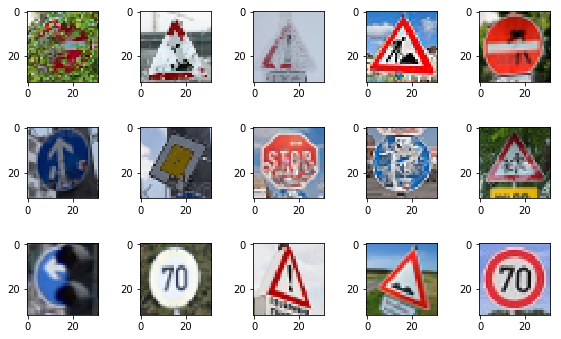

In [20]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from matplotlib.image import imread
import csv

new_images = np.array([imread("./traffic-signs/{}.jpg".format(i+1)) for i in range(15)])

y_test_new = []
with open('./traffic-signs/sign_ids.csv') as sign_id_file:
    sign_id_reader = csv.DictReader(sign_id_file)
    y_test_new = [int(row['ClassId']) for row in sign_id_reader]

num_x = 5
num_y = 3
fig, ax = plt.subplots(num_y,num_x,figsize=(8, 5))
fig.tight_layout()
for i in range(num_x*num_y):
    ax[int(i/num_x)][int(i%num_x)].imshow(new_images[i])

plt.show()

In [21]:
# read csv to get sign names
sign_names = []
with open('signnames.csv') as signname_file:
    signname_reader = csv.DictReader(signname_file)
    sign_names = np.array([row['SignName'] for row in signname_reader])

### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

Preprocess images.

In [22]:
X_test_new = normalize_data(new_images)

Predict the sign type of new images.

INFO:tensorflow:Restoring parameters from ./transnet_densenet


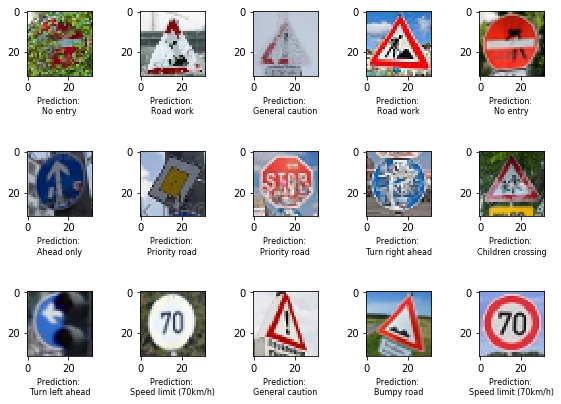

In [23]:
prediction_operation = tf.argmax(logits, 1)

def get_predictions(X_data):
    num_examples = len(X_data)
    prediction_data = np.array([])
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        predictions = sess.run(prediction_operation, feed_dict={x: batch_x, keep_prob: 1.0,  is_train: False})
        prediction_data = np.append(prediction_data, predictions)

    return prediction_data

with tf.Session() as sess:
    saver.restore(sess, './transnet_densenet')

    predicted_classes = get_predictions(X_test_new)

    fig, ax = plt.subplots(num_y,num_x)
    fig.set_size_inches(8,6)
    fig.tight_layout()
    for i in range(num_x*num_y):
        ax[int(i/num_x)][int(i%num_x)].imshow(new_images[i])
    
        ax[int(i/num_x)][int(i%num_x)].set_xlabel("Prediction: \n"+sign_names[int(predicted_classes[int(i)])],fontsize=8)

    plt.show()

### Analyze Performance

In [24]:
### Calculate the accuracy for these 15 new images. 
### For example, if the model predicted 3 out of 15 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, './transnet_densenet')
    
    accuracy = evaluate(X_test_new, y_test_new)
    print("Accuracy = {:.3f}".format(accuracy))

INFO:tensorflow:Restoring parameters from ./transnet_densenet
Accuracy = 0.933


Calculate the precision and recall for each traffic sign type from the test set.

INFO:tensorflow:Restoring parameters from ./transnet_densenet


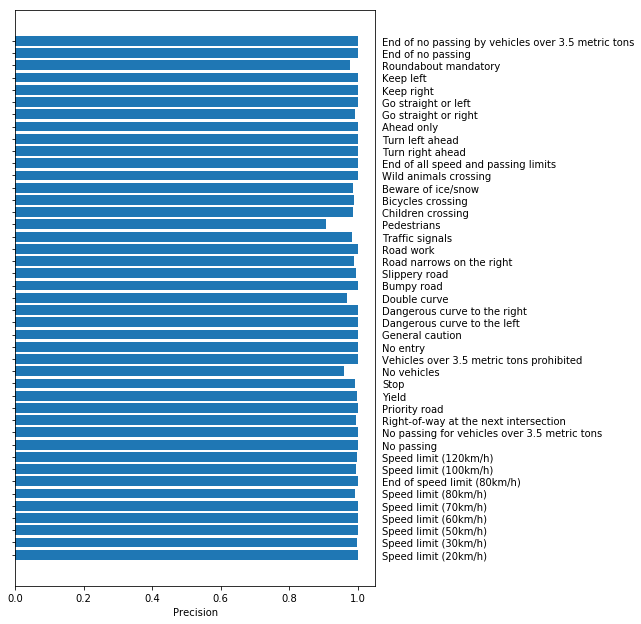

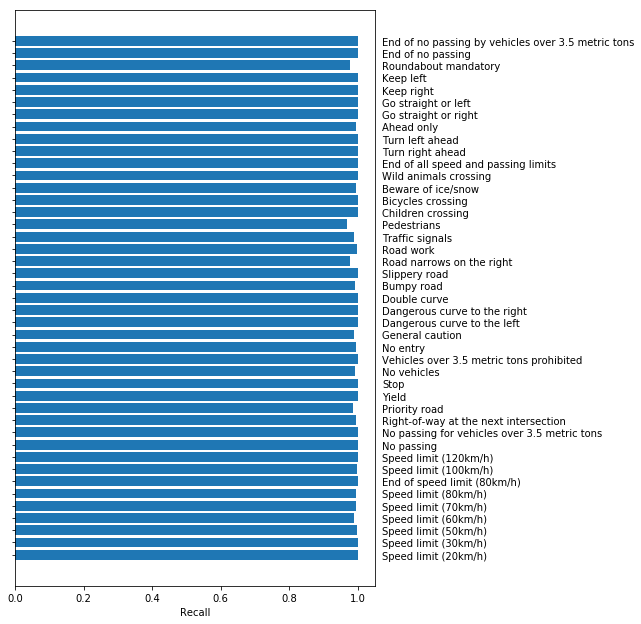

In [25]:
from sklearn.metrics import confusion_matrix

with tf.Session() as sess:
    saver.restore(sess, './transnet_densenet')
    
    predicted_data = get_predictions(X_test)
    
    cm = confusion_matrix(y_true = y_test,y_pred = predicted_data)
    
    predicted_counts = np.sum(cm, axis=0)
    true_counts =  np.sum(cm, axis=1)
    true_positives = np.diag(cm)
    precision = true_positives/predicted_counts
    recall = true_positives/true_counts

    plt.figure(figsize=(10,10))
    plt.axes([0.05,0.1,0.5,0.8])
    plt.barh(np.arange(n_classes)+.5, precision, align='center')
    plt.yticks(np.arange(n_classes)+.5, sign_names)
    plt.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='on')
    plt.xlabel('Precision')
    plt.savefig('./examples/precision.jpg')
    plt.show()
    print()
    plt.figure(figsize=(10,10))
    plt.axes([0.05,0.1,0.5,0.8])
    plt.barh(np.arange(n_classes)+.5, recall, align='center')
    plt.yticks(np.arange(n_classes)+.5, sign_names)
    plt.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='on')
    plt.xlabel('Recall')
    plt.savefig('./examples/recall.jpg')
    plt.show()

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./transnet_densenet
Image: ./traffic-signs/1.jpg
Traffic sign type: No entry
Predictions:
No entry: 0.68441767
Stop: 0.14791575
Priority road: 0.05323082
Yield: 0.011851982
No passing for vehicles over 3.5 metric tons: 0.0117532695


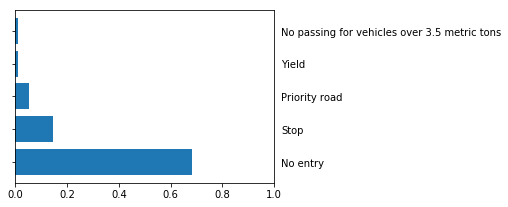


Image: ./traffic-signs/2.jpg
Traffic sign type: Road work
Predictions:
Road work: 0.652675
Go straight or right: 0.15080528
Bumpy road: 0.04137244
Right-of-way at the next intersection: 0.023628656
General caution: 0.019095229


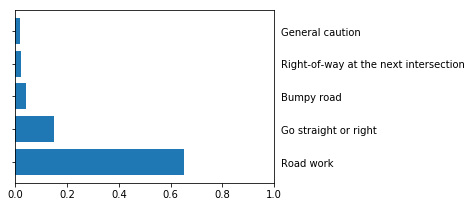


Image: ./traffic-signs/3.jpg
Traffic sign type: General caution
Predictions:
General caution: 0.4230909
Right-of-way at the next intersection: 0.35896713
Pedestrians: 0.075514
Go straight or left: 0.03221925
Traffic signals: 0.01742872


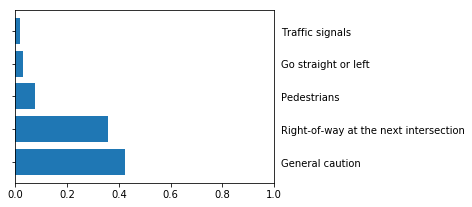


Image: ./traffic-signs/4.jpg
Traffic sign type: Slippery road
Predictions:
Road work: 0.991439
Keep left: 0.0025122187
Go straight or right: 0.0015289161
Stop: 0.0008095841
General caution: 0.00044973224


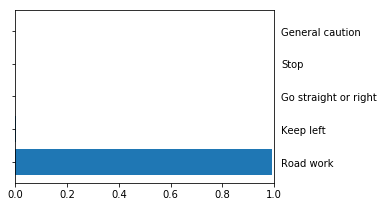


Image: ./traffic-signs/5.jpg
Traffic sign type: No entry
Predictions:
No entry: 0.9992902
Stop: 0.00045257795
Slippery road: 2.2975235e-05
Children crossing: 2.0329826e-05
Wild animals crossing: 1.9321327e-05


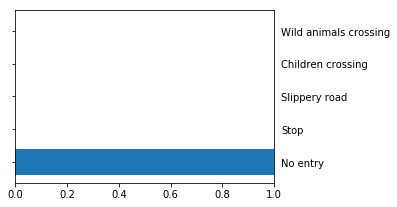


Image: ./traffic-signs/6.jpg
Traffic sign type: Ahead only
Predictions:
Ahead only: 0.9952211
Turn right ahead: 0.0012589263
Priority road: 0.00054830674
Roundabout mandatory: 0.00047350282
Traffic signals: 0.00032855498


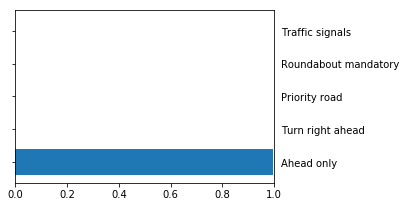


Image: ./traffic-signs/7.jpg
Traffic sign type: Priority road
Predictions:
Priority road: 0.9973345
Keep right: 0.0002746618
Roundabout mandatory: 0.00023904396
Ahead only: 0.00018890214
Turn left ahead: 0.00016934969


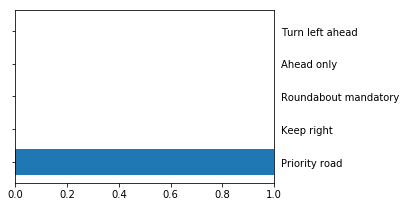


Image: ./traffic-signs/8.jpg
Traffic sign type: Stop
Predictions:
Priority road: 0.54199773
Stop: 0.35776013
No entry: 0.027231285
Go straight or left: 0.0099358
Ahead only: 0.009465913


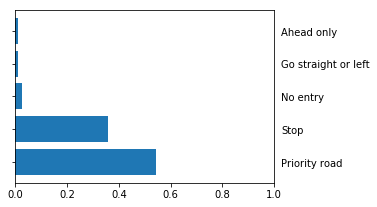


Image: ./traffic-signs/9.jpg
Traffic sign type: Turn right ahead
Predictions:
Turn right ahead: 0.3078608
Roundabout mandatory: 0.25364423
Keep left: 0.16230176
Keep right: 0.07043269
Pedestrians: 0.034394156


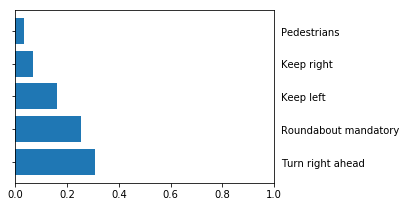


Image: ./traffic-signs/10.jpg
Traffic sign type: Children crossing
Predictions:
Children crossing: 0.9979644
Pedestrians: 0.00076279236
Roundabout mandatory: 0.00019365018
Speed limit (100km/h): 0.00018733578
Speed limit (30km/h): 0.0001830899


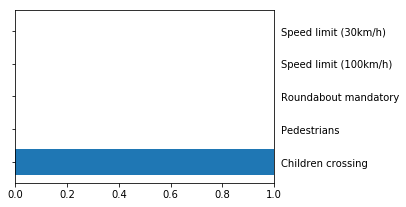


Image: ./traffic-signs/11.jpg
Traffic sign type: Turn left ahead
Predictions:
Turn left ahead: 0.7538413
Go straight or right: 0.049201075
Keep right: 0.047772583
Priority road: 0.03675174
Ahead only: 0.028343054


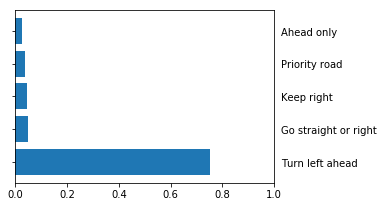


Image: ./traffic-signs/12.jpg
Traffic sign type: Speed limit (70km/h)
Predictions:
Speed limit (70km/h): 0.98766553
Speed limit (30km/h): 0.0029435854
Pedestrians: 0.001769929
Speed limit (20km/h): 0.00092452194
Dangerous curve to the left: 0.000903425


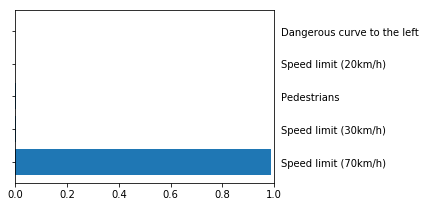


Image: ./traffic-signs/13.jpg
Traffic sign type: General caution
Predictions:
General caution: 0.99483925
Pedestrians: 0.0010836464
No entry: 0.00061260955
Traffic signals: 0.0005754149
Road narrows on the right: 0.00035156435


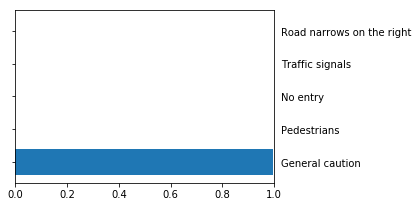


Image: ./traffic-signs/14.jpg
Traffic sign type: Bumpy road
Predictions:
Bumpy road: 0.99587363
No passing for vehicles over 3.5 metric tons: 0.0007228298
Turn left ahead: 0.0005023111
Speed limit (60km/h): 0.00043708793
No passing: 0.00030782967


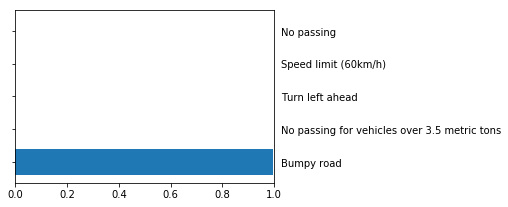


Image: ./traffic-signs/15.jpg
Traffic sign type: Speed limit (70km/h)
Predictions:
Speed limit (70km/h): 0.9706179
Speed limit (20km/h): 0.018677684
Speed limit (30km/h): 0.0026106364
Speed limit (120km/h): 0.0016956013
Pedestrians: 0.001688456


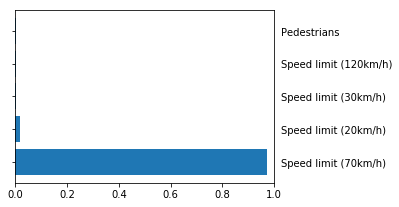

In [26]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
top_k = 5

top_predictions = tf.nn.top_k(tf.nn.softmax(logits), k=top_k)

with tf.Session() as sess:
    saver.restore(sess, './transnet_densenet')
    predictions = sess.run(top_predictions, feed_dict={x:X_test_new, keep_prob: 1.0, is_train: False})
    
    
    for i in range(15):
        print("Image: ./traffic-signs/{}.jpg".format(i+1))
        print("Traffic sign type: "+sign_names[y_test_new[i]])
        print("Predictions:")
        for j in range(top_k):
            print(sign_names[predictions.indices[int(i)][int(j)]]+": "+str(predictions.values[int(i)][int(j)]))

        plt.figure(figsize=(8,3))
        plt.axes([0.05,0.1,0.45,0.8])
        plt.xlim([0, 1.0])
        plt.barh(np.arange(top_k)+.5, predictions.values[int(i)], align='center')
        plt.yticks(np.arange(top_k)+.5, sign_names[predictions.indices[int(i)].astype(int)])
        plt.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='on')
        plt.savefig("./top_k_predictions/{}.jpg".format(i+1))
        plt.show()
        print()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [27]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input,keep_prob: 1.0,is_train: False})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(14,8))
    for featuremap in range(featuremaps):
        plt.subplot(4,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

Untrained model


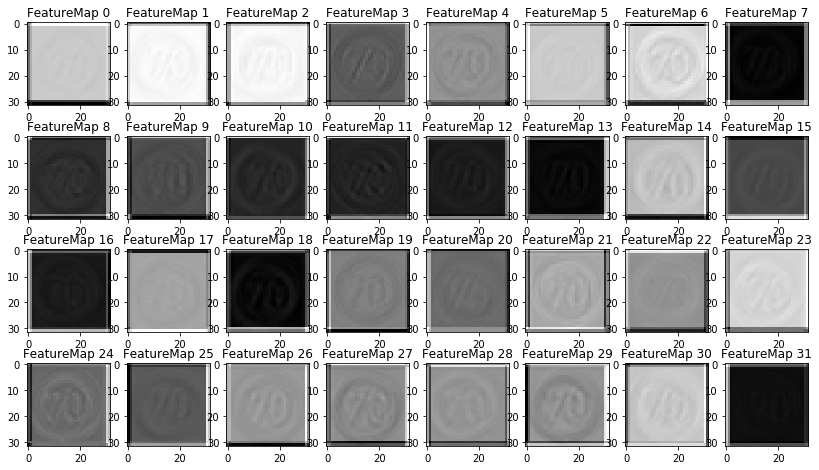


INFO:tensorflow:Restoring parameters from ./transnet_densenet
Trained model


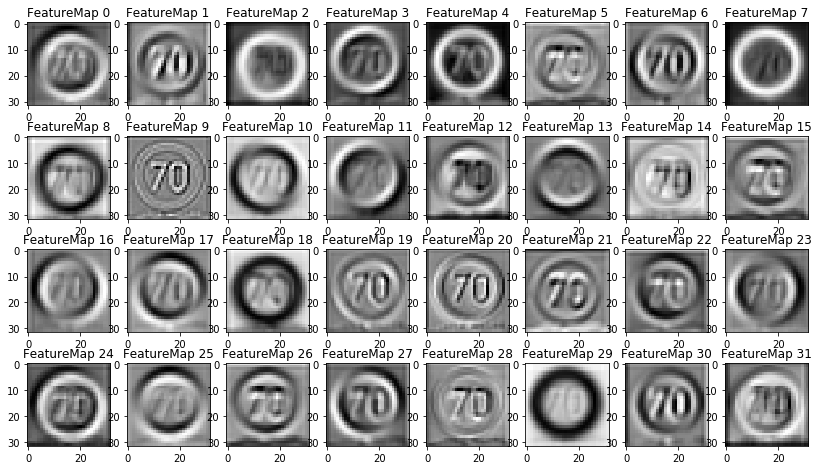


Trained model with missing features


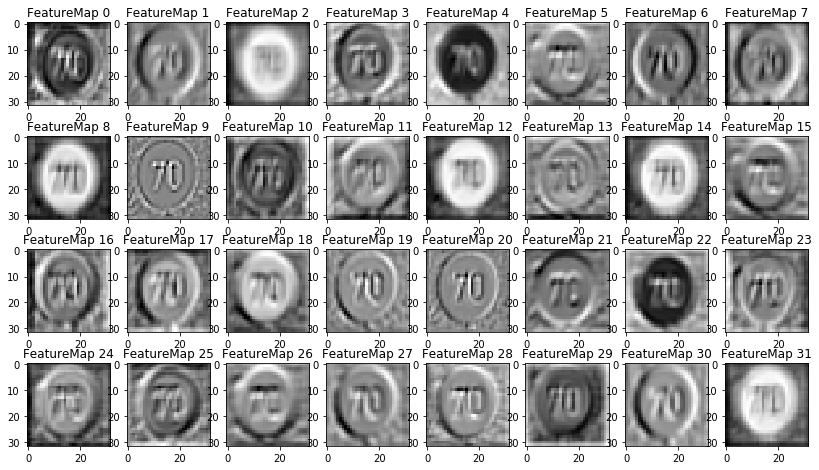

In [28]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('Untrained model')
    outputFeatureMap([X_test_new[14]],conv_layers['conv1'])
    plt.savefig('./examples/visualize_cnn_untrained_15.jpg')
    plt.show()
    print()
    saver.restore(sess, './transnet_densenet')
    print('Trained model')
    outputFeatureMap([X_test_new[14]],conv_layers['conv1'])
    plt.savefig('./examples/visualize_cnn_15.jpg')
    plt.show()
    print()
    print('Trained model with missing features')
    outputFeatureMap([X_test_new[11]],conv_layers['conv1'])
    plt.savefig('./examples/visualize_cnn_12.jpg')
    plt.show()
    print()